# TRAINING A CLASSIFIER (CIFAR10)

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [1]:
%load_ext watermark
%config Completer.use_jedi = False

In [2]:
import pandas as pd

In [34]:
#import matplotlib.pyplot as plt
#%matplotlib inline
#from IPython.core.pylabtools import figsize
#figsize(12, 8)

#import seaborn as sns
#sns.set_theme()

#pd.set_option("max_columns", None)
#pd.set_option("max_rows", None)

from IPython.display import Markdown, display
def md(arg):
    display(Markdown(arg))

#from pandas_profiling import ProfileReport
# report = ProfileReport(#DataFrame here#, minimal=True)
# report.to

#import pyarrow.parquet as pq
# df = pq.ParquetDataset(path_to_folder_with_parquets, filesystem=None).read_pandas().to_pandas()

In [35]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.8.0-7630-generic
Machine     : x86_64
Processor   : 
CPU cores   : 8
Architecture: 64bit

Git hash: 21d1352fc956b984bbfea25273b5bba145e506ba

Git repo: https://github.com/ysraell/examples.git

Git branch: master

matplotlib : 3.3.4
torchvision: 0.8.2+cpu
pandas     : 1.2.1
sys        : 3.7.9 (default, Jan 12 2021, 17:26:22) 
[GCC 8.3.0]
json       : 2.0.9
torch      : 1.7.1+cpu
ipywidgets : 7.6.3
numpy      : 1.19.5

CPU	: Intel(R) Xeon(R) CPU E3-1241 v3 @ 3.50GHz
Mem:           31G
Swap:         4.0G


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


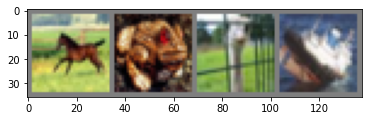

horse  frog  bird  ship


In [56]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [71]:
import torch.nn as nn
import torch.nn.functional as F

def dim_out_calc(n_in, p, k, s):
    '''
        Source: https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807
        Only for square image, kernel and padding.
    '''
    return (n_in +2*p -k)/s +1

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        N_input_square_images = 32
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        n_out = dim_out_calc(N_input_square_images, p=0, k=5, s=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        n_out = n_out//2
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        n_out = dim_out_calc(n_out, p=0, k=5, s=1)
        
        # Becouse pool is called twice.
        n_out = int(n_out//2)

        self.fc1 = nn.Linear(16 * n_out * n_out, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def forward_show_steps(self, x):
        md(f'### Input image size: `{x.shape}`')
        imshow(x[0,:])
        
        x = self.conv1(x)
        channels = net.conv1.out_channels
        md(f'### Conv1 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()

        x = F.relu(x)
        md(f'### RELU1 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()
            
        x = self.pool(x)
        md(f'### Pool 1 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()
            
        x = self.conv2(x)
        channels = net.conv2.out_channels
        md(f'### Conv2 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()

        x = F.relu(x)
        md(f'### RELU2 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()
            
        x = self.pool(x)
        md(f'### Pool 2 output image size: `{x.shape}`')
        for c in range(channels):
            md(f'Channel: {c}')
            plt.imshow(x[0,c,:].detach().numpy())
            plt.show()
        
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

### Input image size: `torch.Size([1, 3, 32, 32])`

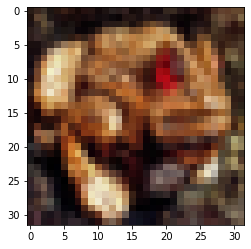

### Conv1 output image size: `torch.Size([1, 6, 28, 28])`

Channel: 0

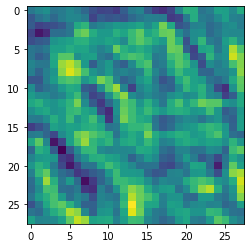

Channel: 1

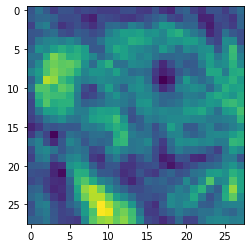

Channel: 2

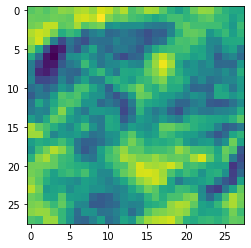

Channel: 3

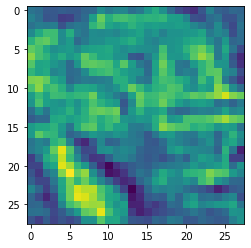

Channel: 4

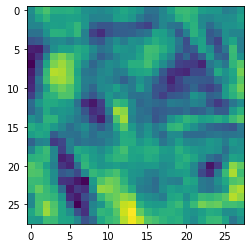

Channel: 5

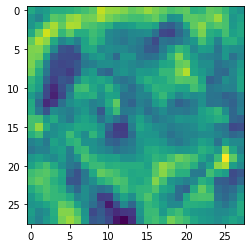

### RELU1 output image size: `torch.Size([1, 6, 28, 28])`

Channel: 0

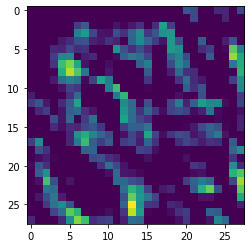

Channel: 1

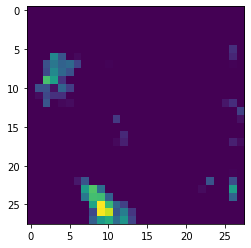

Channel: 2

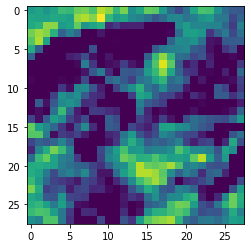

Channel: 3

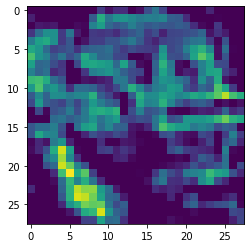

Channel: 4

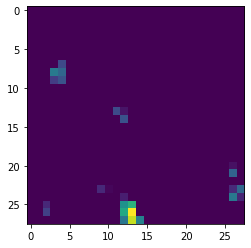

Channel: 5

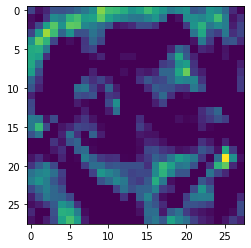

### Pool 1 output image size: `torch.Size([1, 6, 14, 14])`

Channel: 0

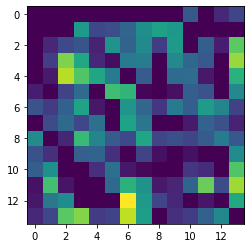

Channel: 1

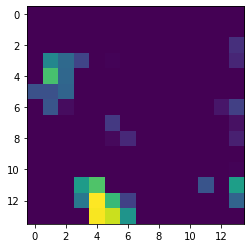

Channel: 2

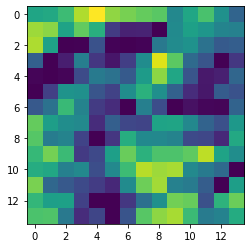

Channel: 3

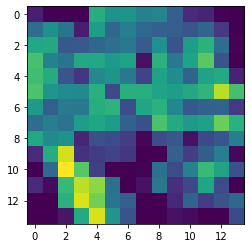

Channel: 4

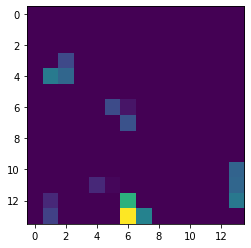

Channel: 5

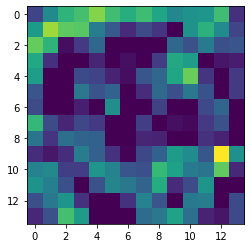

### Conv2 output image size: `torch.Size([1, 16, 10, 10])`

Channel: 0

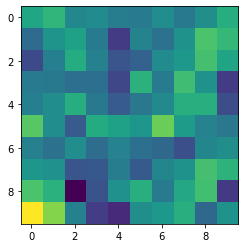

Channel: 1

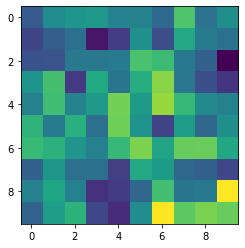

Channel: 2

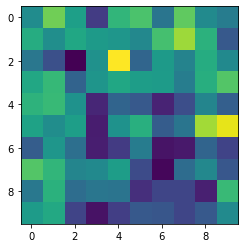

Channel: 3

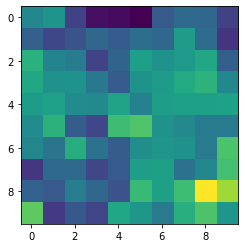

Channel: 4

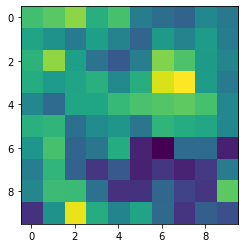

Channel: 5

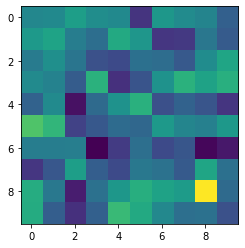

Channel: 6

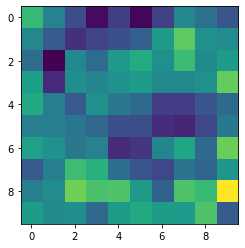

Channel: 7

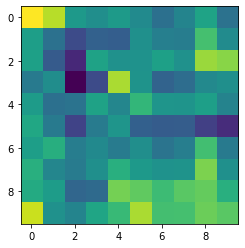

Channel: 8

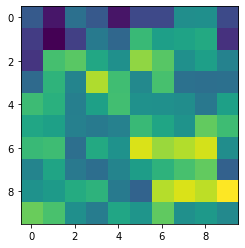

Channel: 9

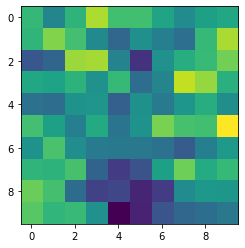

Channel: 10

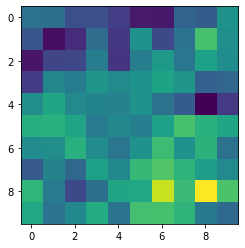

Channel: 11

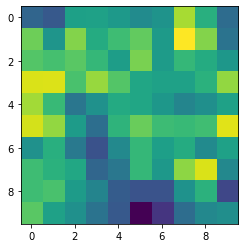

Channel: 12

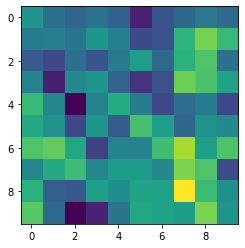

Channel: 13

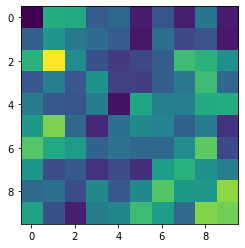

Channel: 14

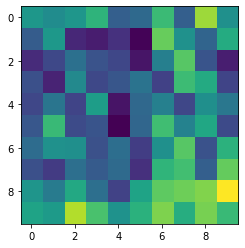

Channel: 15

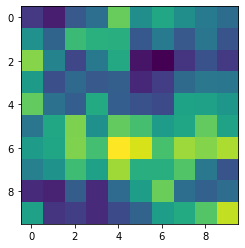

### RELU2 output image size: `torch.Size([1, 16, 10, 10])`

Channel: 0

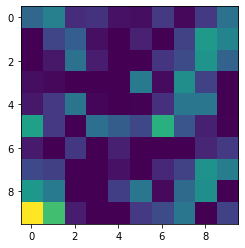

Channel: 1

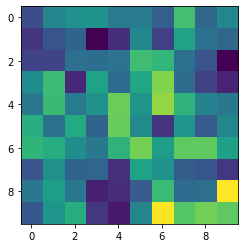

Channel: 2

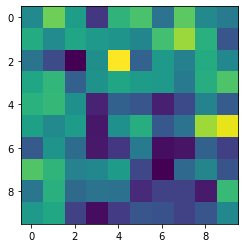

Channel: 3

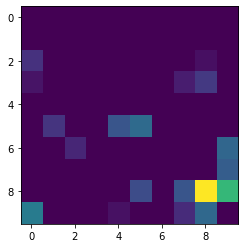

Channel: 4

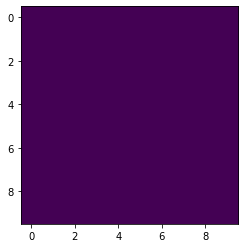

Channel: 5

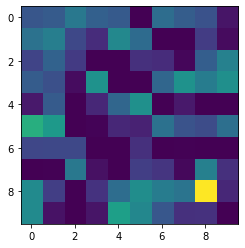

Channel: 6

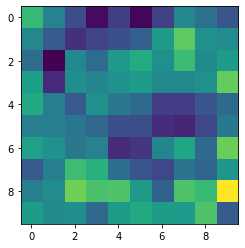

Channel: 7

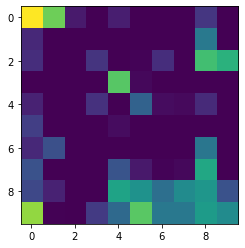

Channel: 8

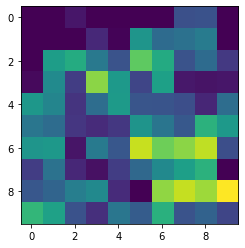

Channel: 9

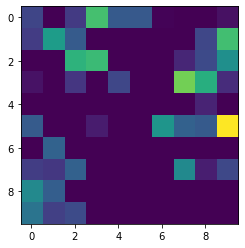

Channel: 10

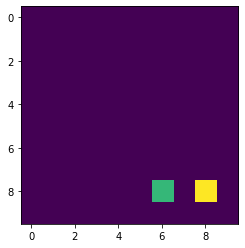

Channel: 11

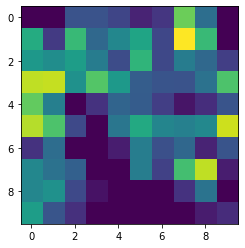

Channel: 12

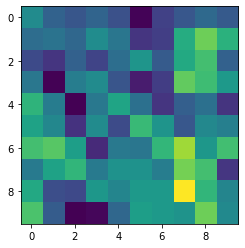

Channel: 13

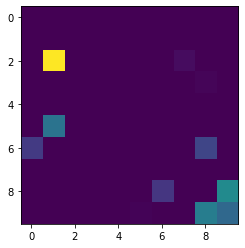

Channel: 14

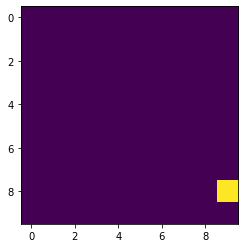

Channel: 15

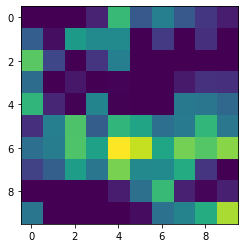

### Pool 2 output image size: `torch.Size([1, 16, 5, 5])`

Channel: 0

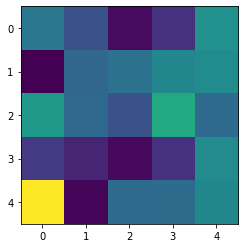

Channel: 1

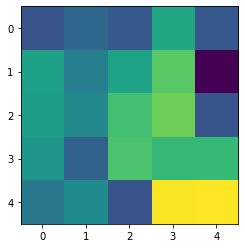

Channel: 2

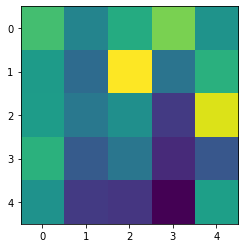

Channel: 3

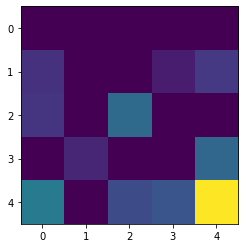

Channel: 4

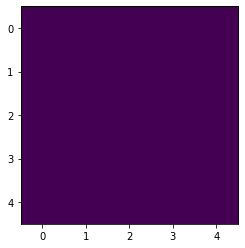

Channel: 5

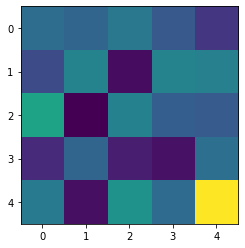

Channel: 6

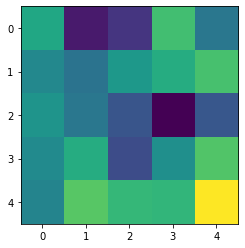

Channel: 7

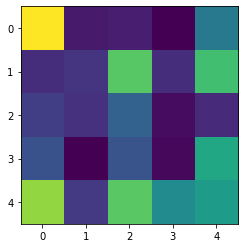

Channel: 8

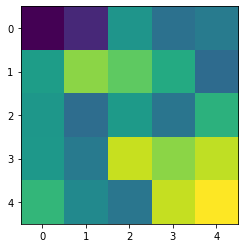

Channel: 9

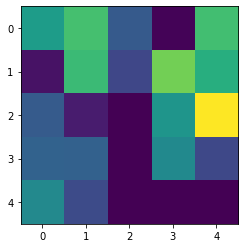

Channel: 10

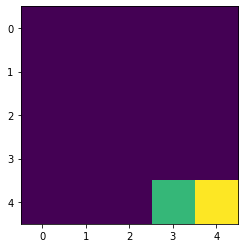

Channel: 11

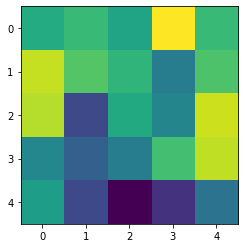

Channel: 12

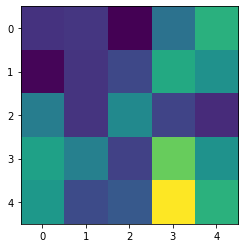

Channel: 13

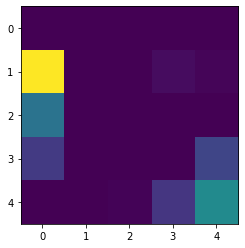

Channel: 14

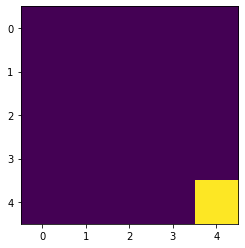

Channel: 15

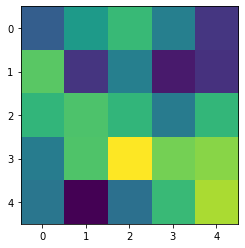

tensor([[-0.0204, -0.0381, -0.0329,  0.0669, -0.0589, -0.0498, -0.0780, -0.0227,
          0.0675, -0.0939]], grad_fn=<AddmmBackward>)

In [72]:
x = images[1,:].unsqueeze(0)
net.forward_show_steps(x)

In [73]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [81]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 2.233
[1,  4000] loss: 1.854
[1,  6000] loss: 1.668
[1,  8000] loss: 1.575
[1, 10000] loss: 1.509
[1, 12000] loss: 1.477
[2,  2000] loss: 1.399
[2,  4000] loss: 1.379
[2,  6000] loss: 1.337
[2,  8000] loss: 1.343
[2, 10000] loss: 1.286
[2, 12000] loss: 1.267
Finished Training


In [82]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [84]:
!ls -lh cifar_net.pth

-rw-r--r-- 1 root root 246K Jan 30 14:27 cifar_net.pth


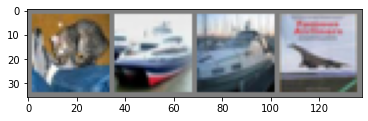

GroundTruth:    cat  ship  ship plane


In [85]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [86]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [88]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


In [92]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [93]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 79 %
Accuracy of  bird : 41 %
Accuracy of   cat : 26 %
Accuracy of  deer : 49 %
Accuracy of   dog : 52 %
Accuracy of  frog : 65 %
Accuracy of horse : 66 %
Accuracy of  ship : 62 %
Accuracy of truck : 48 %
